## 멜론차트 Crawling & WordCloud

In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
# 헤더 확인
res =req.get(url, headers=header)

#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')

In [2]:
song = html.select('.ellipsis.rank01>span>a')
singer = html.select('.ellipsis.rank02>a')
song_list=[i.text for i in song]
singer_list = [i.text for i in singer]

# 랭킹 리스트 생성, 각 리스트 길이 확인
rank_list =[i+1 for i in range(len(song_list))]
print(len(rank_list))
print(len(singer_list))
print(len(song_list))

100
110
100


In [3]:
#딕셔너리 형태로 생성하고 데이터 프레임 생성
top_100={'순위':rank_list, '가수':singer_list[:100], '곡명':song_list}
top_100_df=pd.DataFrame(top_100)
top_100_df

,순위,가수,곡명
0,1,EXO,첫 눈
1,2,LE SSERAFIM (르세라핌),Perfect Night
2,3,aespa,Drama
3,4,태연 (TAEYEON),To. X
4,5,IVE (아이브),Baddie
...,...,...,...
95,96,NCT 127,그중에 그대를 만나
96,97,지아,그대가 내 안에 박혔다(그내박)
97,98,탑현,Fact Check (불가사의; 不可思議)
98,99,폴킴,Must Have Love


In [4]:
from collections import Counter

# counter를 이용해 각 단어의 개수.
counter = Counter(singer_list)
counter

Counter({'EXO': 1,
         'LE SSERAFIM (르세라핌)': 3,
         'aespa': 2,
         '태연 (TAEYEON)': 1,
         'IVE (아이브)': 7,
         '박재정': 1,
         '임재현': 1,
         '정국': 4,
         '범진': 1,
         '임영웅': 13,
         'AKMU (악뮤)': 3,
         '제니 (JENNIE)': 1,
         '너드커넥션 (Nerd Connection)': 1,
         '이무진': 2,
         'NewJeans': 7,
         '우디 (Woody)': 1,
         '로이킴': 2,
         '성시경': 3,
         '디오 (D.O.)': 1,
         '폴킴': 2,
         'Sia': 1,
         '(여자)아이들': 1,
         'RIIZE': 1,
         '볼빨간사춘기': 1,
         '다이나믹 듀오': 1,
         '이영지': 1,
         '박효신': 1,
         '이석훈': 1,
         '서인국': 1,
         'VIXX (빅스)': 1,
         'Mariah Carey': 1,
         '전소미': 1,
         '세븐틴 (SEVENTEEN)': 2,
         'Red Velvet (레드벨벳)': 1,
         'QWER': 1,
         '임한별': 1,
         '나얼': 1,
         '윤하 (YOUNHA)': 1,
         '멜로망스': 1,
         '방탄소년단': 3,
         '아이유': 1,
         'Ariana Grande': 2,
         'PLAVE': 2,
         'DK(디셈버)': 1,
 

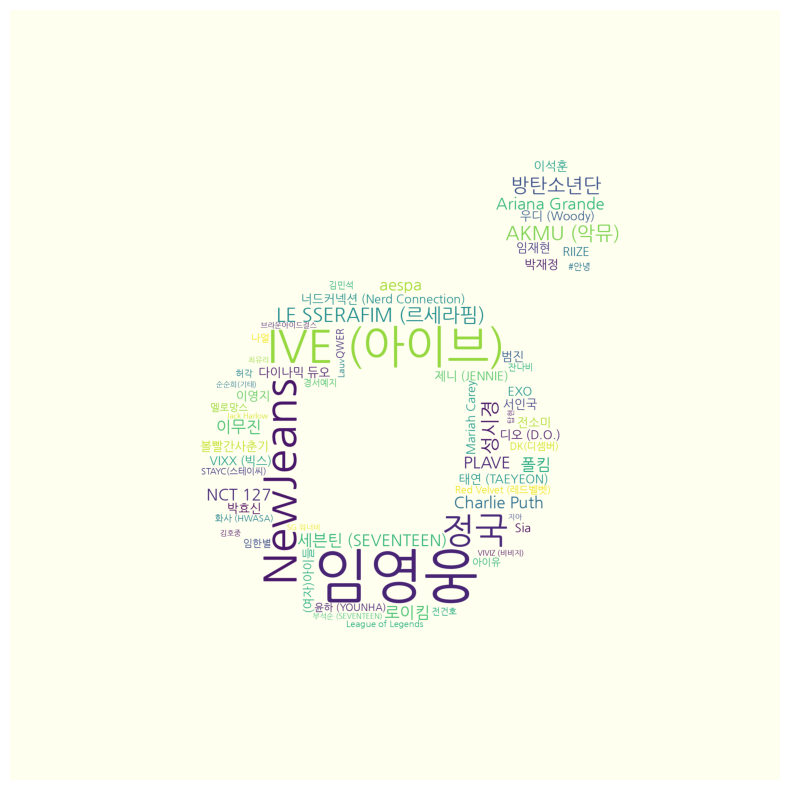

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

mask = np.array(Image.open('music.png'))
wordcloud = WordCloud(font_path='NanumGothic.ttf', mask=mask, background_color='ivory')
img = wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## 2. 한글 텍스트 WordCloud
한글 텍스트를 간단히 처리하여 wordcloud를 그린 결과 해당 텍스트가 마포구, 상암의 맛집에 대한 리뷰를 담고 있다는 것을 추론해볼 수 있다


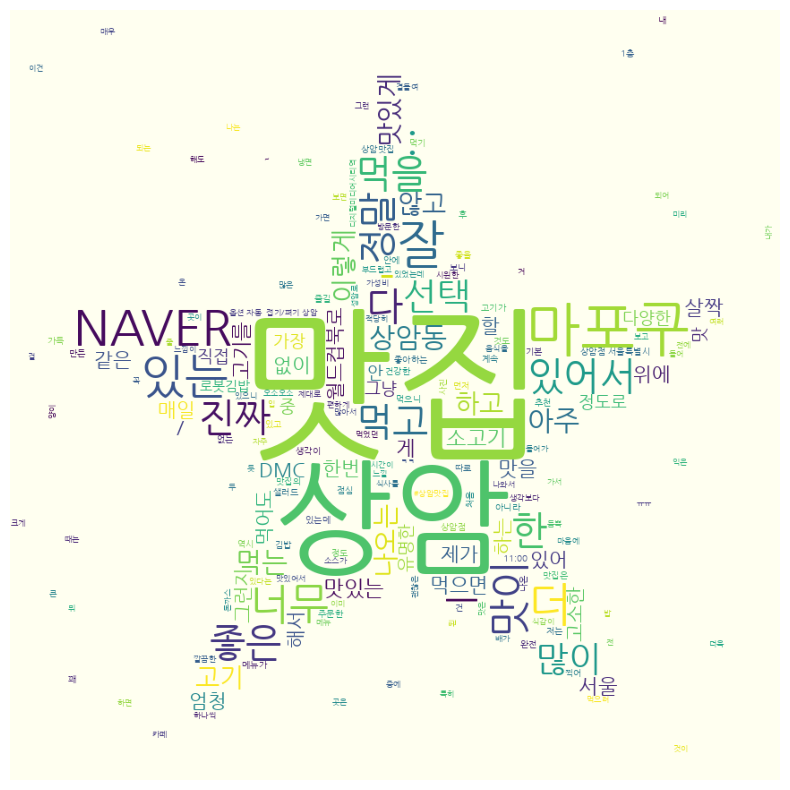

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 한글 불용어 설정
ko_stopwords = ['가','가까스로','가령','각','각각','각자','각종','갖고말하자면','같다','같이','개의치않고','거니와','거바','거의','것','것과 같이','것들','게다가','게우다','겨우','견지에서','결과에 이르다','결국','결론을 낼 수 있다','겸사겸사','고려하면','고로','곧','공동으로','과','과연','관계가 있다','관계없이','관련이 있다','관하여','관한','관해서는','구','구체적으로','구토하다','그','그들','그때','그래','그래도','그래서','그러나','그러니','그러니까','그러면','그러므로','그러한즉','그런 까닭에','그런데','그런즉','그럼','그럼에도 불구하고','그렇게 함으로써','그렇지','그렇지 않다면','그렇지 않으면','그렇지만','그렇지않으면','그리고','그리하여','그만이다','그에 따르는','그위에','그저','그중에서','그치지 않다','근거로','근거하여','기대여','기점으로','기준으로','기타','까닭으로','까악','까지','까지 미치다','까지도','꽈당','끙끙','끼익','나','나머지는','남들','남짓','너','너희','너희들','네','넷','년','논하지 않다','놀라다','누가 알겠는가','누구','다른','다른 방면으로','다만','다섯','다소','다수','다시 말하자면','다시말하면','다음','다음에','다음으로','단지','답다','당신','당장','대로 하다','대하면','대하여','대해 말하자면','대해서','댕그','더구나','더군다나','더라도','더불어','더욱더','더욱이는','도달하다','도착하다','동시에','동안','된바에야','된이상','두번째로','둘','둥둥','뒤따라','뒤이어','든간에','들','등','등등','딩동','따라','따라서','따위','따지지 않다','딱','때','때가 되어','때문에','또','또한','뚝뚝','라 해도','령','로','로 인하여','로부터','로써','륙','를','마음대로','마저','마저도','마치','막론하고','만 못하다','만약','만약에','만은 아니다','만이 아니다','만일','만큼','말하자면','말할것도 없고','매','매번','메쓰겁다','몇','모','모두','무렵','무릎쓰고','무슨','무엇','무엇때문에','물론','및','바꾸어말하면','바꾸어말하자면','바꾸어서 말하면','바꾸어서 한다면','바꿔 말하면','바로','바와같이','밖에 안된다','반대로','반대로 말하자면','반드시','버금','보는데서','보다더','보드득','본대로','봐','봐라','부류의 사람들','부터','불구하고','불문하고','붕붕','비걱거리다','비교적','비길수 없다','비로소','비록','비슷하다','비추어 보아','비하면','뿐만 아니라','뿐만아니라','뿐이다','삐걱','삐걱거리다','사','삼','상대적으로 말하자면','생각한대로','설령','설마','설사','셋','소생','소인','솨','쉿','습니까','습니다','시각','시간','시작하여','시초에','시키다','실로','심지어','아','아니','아니나다를가','아니라면','아니면','아니었다면','아래윗','아무거나','아무도','아야','아울러','아이','아이고','아이구','아이야','아이쿠','아하','아홉','안 그러면','않기 위하여','않기 위해서','알 수 있다','알았어','앗','앞에서','앞의것','야','약간','양자','어','어기여차','어느','어느 년도','어느것','어느곳','어느때','어느쪽','어느해','어디','어때','어떠한','어떤','어떤것','어떤것들','어떻게','어떻해','어이','어째서','어쨋든','어쩔수 없다','어찌','어찌됏든','어찌됏어','어찌하든지','어찌하여','언제','언젠가','얼마','얼마 안 되는 것','얼마간','얼마나','얼마든지','얼마만큼','얼마큼','엉엉','에','에 가서','에 달려 있다','에 대해','에 있다','에 한하다','에게','에서','여','여기','여덟','여러분','여보시오','여부','여섯','여전히','여차','연관되다','연이서','영','영차','옆사람','예','예를 들면','예를 들자면','예컨대','예하면','오','오로지','오르다','오자마자','오직','오호','오히려','와','와 같은 사람들','와르르','와아','왜','왜냐하면','외에도','요만큼','요만한 것','요만한걸','요컨대','우르르','우리','우리들','우선','우에 종합한것과같이','운운','월','위에서 서술한바와같이','위하여','위해서','윙윙','육','으로','으로 인하여','으로서','으로써','을','응','응당','의','의거하여','의지하여','의해','의해되다','의해서','이','이 되다','이 때문에','이 밖에','이 외에','이 정도의','이것','이곳','이때','이라면','이래','이러이러하다','이러한','이런','이럴정도로','이렇게 많은 것','이렇게되면','이렇게말하자면','이렇구나','이로 인하여','이르기까지','이리하여','이만큼','이번','이봐','이상','이어서','이었다','이와 같다','이와 같은','이와 반대로','이와같다면','이외에도','이용하여','이유만으로','이젠','이지만','이쪽','이천구','이천육','이천칠','이천팔','인 듯하다','인젠','일','일것이다','일곱','일단','일때','일반적으로','일지라도','임에 틀림없다','입각하여','입장에서','잇따라','있다','자','자기','자기집','자마자','자신','잠깐','잠시','저','저것','저것만큼','저기','저쪽','저희','전부','전자','전후','점에서 보아','정도에 이르다','제','제각기','제외하고','조금','조차','조차도','졸졸','좀','좋아','좍좍','주룩주룩','주저하지 않고','줄은 몰랏다','줄은모른다','중에서','중의하나','즈음하여','즉','즉시','지든지','지만','지말고','진짜로','쪽으로','차라리','참','참나','첫번째로','쳇','총적으로','총적으로 말하면','총적으로 보면','칠','콸콸','쾅쾅','쿵','타다','타인','탕탕','토하다','통하여','툭','퉤','틈타','팍','팔','퍽','펄렁','하','하게될것이다','하게하다','하겠는가','하고 있다','하고있었다','하곤하였다','하구나','하기 때문에','하기 위하여','하기는한데','하기만 하면','하기보다는','하기에','하나','하느니','하는 김에','하는 편이 낫다','하는것도','하는것만 못하다','하는것이 낫다','하는바','하더라도','하도다','하도록시키다','하도록하다','하든지','하려고하다','하마터면','하면 할수록','하면된다','하면서','하물며','하여금','하여야','하자마자','하지 않는다면','하지 않도록','하지마','하지마라','하지만','하하','한 까닭에','한 이유는','한 후','한다면','한다면 몰라도','한데','한마디','한적이있다','한켠으로는','한항목','할 따름이다','할 생각이다','할 줄 안다','할 지경이다','할 힘이 있다','할때','할만하다','할망정','할뿐','할수있다','할수있어','할줄알다','할지라도','할지언정','함께','해도된다','해도좋다','해봐요','해서는 안된다','해야한다','해요','했어요','향하다','향하여','향해서','허','허걱','허허','헉','헉헉','헐떡헐떡','형식으로 쓰여','혹시','혹은','혼자','훨씬','휘익','휴','흐흐','흥','힘입어']
ko_stopwords += '수'

# 어휘 단위로 읽어와서 texts에 저장(불용어는 제외)
texts = []
with open("hangul_text.txt", "r") as fp:
  all = fp.read()
  words = all.split(' ')
  for word in words:
    word = word.replace("<b>","").replace("</b>", "").replace('.', ' ').replace('"',' ').replace(',',' ').replace("'","").replace('·', ' ').replace('=',' ').replace('\n',' ').strip()
    if word not in ko_stopwords:
      texts.append(word)

# counter를 이용해 각 단어의 개수
counter = Counter(texts)

mask = np.array(Image.open('star.png'))
wordcloud = WordCloud(font_path='NanumGothic.ttf', mask=mask, background_color='ivory')
# WordCloud의 stopwords가 제대로 작동하지 않아서 위에서 texts를 구성하는 단계에서 처리했다

img = wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

문장에서 명사만 추출해서 만든 WordCloud

In [ ]:
!pip install konlpy

In [17]:
from konlpy.tag import Hannanum # 문장에서 명사를 추출하는 형태소 분석 라이브러리
hannanum = Hannanum()
noun_list = []
final = []
with open("hangul_text.txt", "r") as fp:
  all = fp.readlines()
  total = []
  for line in all:
    total.append(line.split(" "))
  for words in total:
    for word in words:
      nouns = hannanum.nouns(word)
      for idx in range(len(nouns)):
        nouns[idx] = nouns[idx].replace("<b>","").replace("</b>", "").replace('.', ' ').replace('"',' ').replace(',',' ').replace("'","").replace('·', ' ').replace('=',' ').replace('\n',' ').strip()
      noun_list += nouns

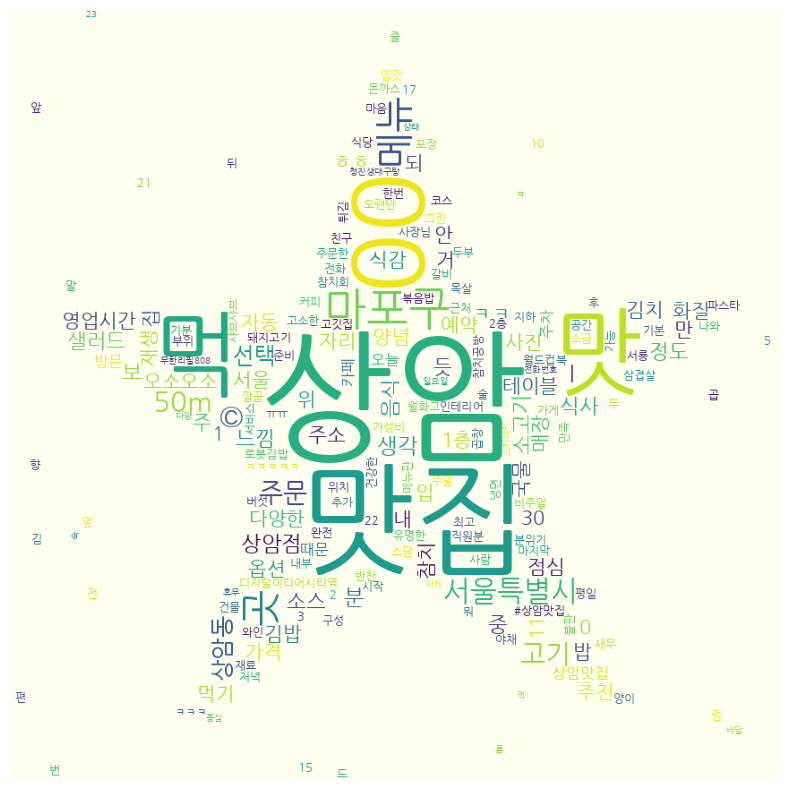

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
from PIL import Image

# 한글 불용어 설정
ko_stopwords = ['가','가까스로','가령','각','각각','각자','각종','갖고말하자면','같다','같이','개의치않고','거니와','거바','거의','것','것과 같이','것들','게다가','게우다','겨우','견지에서','결과에 이르다','결국','결론을 낼 수 있다','겸사겸사','고려하면','고로','곧','공동으로','과','과연','관계가 있다','관계없이','관련이 있다','관하여','관한','관해서는','구','구체적으로','구토하다','그','그들','그때','그래','그래도','그래서','그러나','그러니','그러니까','그러면','그러므로','그러한즉','그런 까닭에','그런데','그런즉','그럼','그럼에도 불구하고','그렇게 함으로써','그렇지','그렇지 않다면','그렇지 않으면','그렇지만','그렇지않으면','그리고','그리하여','그만이다','그에 따르는','그위에','그저','그중에서','그치지 않다','근거로','근거하여','기대여','기점으로','기준으로','기타','까닭으로','까악','까지','까지 미치다','까지도','꽈당','끙끙','끼익','나','나머지는','남들','남짓','너','너희','너희들','네','넷','년','논하지 않다','놀라다','누가 알겠는가','누구','다른','다른 방면으로','다만','다섯','다소','다수','다시 말하자면','다시말하면','다음','다음에','다음으로','단지','답다','당신','당장','대로 하다','대하면','대하여','대해 말하자면','대해서','댕그','더구나','더군다나','더라도','더불어','더욱더','더욱이는','도달하다','도착하다','동시에','동안','된바에야','된이상','두번째로','둘','둥둥','뒤따라','뒤이어','든간에','들','등','등등','딩동','따라','따라서','따위','따지지 않다','딱','때','때가 되어','때문에','또','또한','뚝뚝','라 해도','령','로','로 인하여','로부터','로써','륙','를','마음대로','마저','마저도','마치','막론하고','만 못하다','만약','만약에','만은 아니다','만이 아니다','만일','만큼','말하자면','말할것도 없고','매','매번','메쓰겁다','몇','모','모두','무렵','무릎쓰고','무슨','무엇','무엇때문에','물론','및','바꾸어말하면','바꾸어말하자면','바꾸어서 말하면','바꾸어서 한다면','바꿔 말하면','바로','바와같이','밖에 안된다','반대로','반대로 말하자면','반드시','버금','보는데서','보다더','보드득','본대로','봐','봐라','부류의 사람들','부터','불구하고','불문하고','붕붕','비걱거리다','비교적','비길수 없다','비로소','비록','비슷하다','비추어 보아','비하면','뿐만 아니라','뿐만아니라','뿐이다','삐걱','삐걱거리다','사','삼','상대적으로 말하자면','생각한대로','설령','설마','설사','셋','소생','소인','솨','쉿','습니까','습니다','시각','시간','시작하여','시초에','시키다','실로','심지어','아','아니','아니나다를가','아니라면','아니면','아니었다면','아래윗','아무거나','아무도','아야','아울러','아이','아이고','아이구','아이야','아이쿠','아하','아홉','안 그러면','않기 위하여','않기 위해서','알 수 있다','알았어','앗','앞에서','앞의것','야','약간','양자','어','어기여차','어느','어느 년도','어느것','어느곳','어느때','어느쪽','어느해','어디','어때','어떠한','어떤','어떤것','어떤것들','어떻게','어떻해','어이','어째서','어쨋든','어쩔수 없다','어찌','어찌됏든','어찌됏어','어찌하든지','어찌하여','언제','언젠가','얼마','얼마 안 되는 것','얼마간','얼마나','얼마든지','얼마만큼','얼마큼','엉엉','에','에 가서','에 달려 있다','에 대해','에 있다','에 한하다','에게','에서','여','여기','여덟','여러분','여보시오','여부','여섯','여전히','여차','연관되다','연이서','영','영차','옆사람','예','예를 들면','예를 들자면','예컨대','예하면','오','오로지','오르다','오자마자','오직','오호','오히려','와','와 같은 사람들','와르르','와아','왜','왜냐하면','외에도','요만큼','요만한 것','요만한걸','요컨대','우르르','우리','우리들','우선','우에 종합한것과같이','운운','월','위에서 서술한바와같이','위하여','위해서','윙윙','육','으로','으로 인하여','으로서','으로써','을','응','응당','의','의거하여','의지하여','의해','의해되다','의해서','이','이 되다','이 때문에','이 밖에','이 외에','이 정도의','이것','이곳','이때','이라면','이래','이러이러하다','이러한','이런','이럴정도로','이렇게 많은 것','이렇게되면','이렇게말하자면','이렇구나','이로 인하여','이르기까지','이리하여','이만큼','이번','이봐','이상','이어서','이었다','이와 같다','이와 같은','이와 반대로','이와같다면','이외에도','이용하여','이유만으로','이젠','이지만','이쪽','이천구','이천육','이천칠','이천팔','인 듯하다','인젠','일','일것이다','일곱','일단','일때','일반적으로','일지라도','임에 틀림없다','입각하여','입장에서','잇따라','있다','자','자기','자기집','자마자','자신','잠깐','잠시','저','저것','저것만큼','저기','저쪽','저희','전부','전자','전후','점에서 보아','정도에 이르다','제','제각기','제외하고','조금','조차','조차도','졸졸','좀','좋아','좍좍','주룩주룩','주저하지 않고','줄은 몰랏다','줄은모른다','중에서','중의하나','즈음하여','즉','즉시','지든지','지만','지말고','진짜로','쪽으로','차라리','참','참나','첫번째로','쳇','총적으로','총적으로 말하면','총적으로 보면','칠','콸콸','쾅쾅','쿵','타다','타인','탕탕','토하다','통하여','툭','퉤','틈타','팍','팔','퍽','펄렁','하','하게될것이다','하게하다','하겠는가','하고 있다','하고있었다','하곤하였다','하구나','하기 때문에','하기 위하여','하기는한데','하기만 하면','하기보다는','하기에','하나','하느니','하는 김에','하는 편이 낫다','하는것도','하는것만 못하다','하는것이 낫다','하는바','하더라도','하도다','하도록시키다','하도록하다','하든지','하려고하다','하마터면','하면 할수록','하면된다','하면서','하물며','하여금','하여야','하자마자','하지 않는다면','하지 않도록','하지마','하지마라','하지만','하하','한 까닭에','한 이유는','한 후','한다면','한다면 몰라도','한데','한마디','한적이있다','한켠으로는','한항목','할 따름이다','할 생각이다','할 줄 안다','할 지경이다','할 힘이 있다','할때','할만하다','할망정','할뿐','할수있다','할수있어','할줄알다','할지라도','할지언정','함께','해도된다','해도좋다','해봐요','해서는 안된다','해야한다','해요','했어요','향하다','향하여','향해서','허','허걱','허허','헉','헉헉','헐떡헐떡','형식으로 쓰여','혹시','혹은','혼자','훨씬','휘익','휴','흐흐','흥','힘입어']
ko_stopwords += '수'

# 불용어 처리
noun_list = [x for x in noun_list if x not in ko_stopwords]

# counter를 이용해 각 단어의 개수
counter = Counter(noun_list)

mask = np.array(Image.open('star.png'))
wordcloud = WordCloud(font_path='NanumGothic.ttf', mask=mask, background_color='ivory')
img = wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()